# Figures for poster

In [1]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import cmocean.cm as cmocean
import glob
import matplotlib.path as mpath
import matplotlib.colors as col
import pandas as pd
import scipy.stats as stats
from tqdm import tqdm
import logging
import matplotlib.cm as cm
from xhistogram.xarray import histogram


logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

figdir = '/g/data/x77/wf4500/ASC_project/analysis_figs/'

In [2]:
client = Client(memory_limit='1400gb',n_workers=48)

ERROR:sqlalchemy.pool.impl.NullPool:Exception during reset or similar
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sqlalchemy/pool/base.py", line 763, in _finalize_fairy
    fairy._reset(pool, transaction_was_reset)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sqlalchemy/pool/base.py", line 1038, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sqlalchemy/engine/default.py", line 683, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 22929999177536 and this is thread id 22928367625984.
ERROR:sqlalchemy.pool.impl.NullPool:Exception closing connection <sqlite3.Connection object at 0x14da7f184e40>
Traceback (most recent call last):
  File "/g

In [3]:
# Load the along-slope velocity field
u_along = xr.open_mfdataset('/g/data/v45/wf4500/ASC_project_files/ASC_10deg_bin.nc')

# resample monthly:
u_along_da_months = u_along.resample(time='1M').mean()#.U_along_contour_binned
u_along_da_months = u_along_da_months.sel(potrho0=slice(13.8,28.42))#.rename({'lon_bin_midpoints': 'lon'})
u_along_da_months.load();

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=blockwise
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False


In [4]:
# Load CSHT field
CSHT_along = xr.open_mfdataset('/g/data/hh5/tmp/access-om/fbd581/ASC_project/Lon_binning/CSHT_ZC_potrho0_10degBins.nc')

# resample monthly:
CSHT_along_monthly = CSHT_along.resample(time='1M').mean()

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=blockwise
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False


In [5]:
# monthly water mass mask 
age_mask = xr.open_mfdataset('/g/data/v45/wf4500/ASC_project_files/**_age_mask.nc')

In [6]:
CSHT_months_binned_CDW = (age_mask.CDW_mask * CSHT_along_monthly )
CSHT_months_binned_AASW = (age_mask.AASW_mask * CSHT_along_monthly )
u_along_da_months_binned_CDW = (age_mask.CDW_mask *u_along_da_months)
u_along_da_months_binned_AASW = (age_mask.AASW_mask *u_along_da_months)


In [7]:
vol_bins = xr.open_mfdataset('/g/data/v45/wf4500/ASC_project_files/Volume_rho_10deg_bins.nc')

In [8]:
## Average over different time scales to get depth-based correlations - but already seperating into water masses 
## in anticipation of correlation

CSHT_annual_binned_CDW = CSHT_months_binned_CDW.groupby('time.year').mean('time').sum(dim = 'potrho0')
U_along_annual_binned_CDW = u_along_da_months_binned_CDW.groupby('time.year').mean('time').mean(dim = 'potrho0')

CSHT_layerwise_binned_CDW = CSHT_months_binned_CDW.sum(dim = 'potrho0')
U_along_layerwise_binned_CDW = u_along_da_months_binned_CDW.mean(dim = 'potrho0')

CSHT_annual_binned_AASW = CSHT_months_binned_AASW.groupby('time.year').mean('time').sum(dim = 'potrho0')
U_along_annual_binned_AASW = u_along_da_months_binned_AASW.groupby('time.year').mean('time').mean(dim = 'potrho0')

CSHT_layerwise_binned_AASW = CSHT_months_binned_AASW.sum(dim = 'potrho0')
U_along_layerwise_binned_AASW = u_along_da_months_binned_AASW.mean(dim = 'potrho0')
U_along_layerwise_binned_AASW

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=blockwise
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=blockwise
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_met

<xarray.Dataset> Size: 217kB
Dimensions:   (lon_bins: 36, time: 732)
Coordinates:
  * lon_bins  (lon_bins) float64 288B -273.5 -263.5 -253.5 ... 56.5 66.5 76.5
  * time      (time) datetime64[ns] 6kB 1958-01-31 1958-02-28 ... 2018-12-31
Data variables:
    U         (time, lon_bins) float64 211kB dask.array<chunksize=(732, 36), meta=np.ndarray>

In [9]:
n_bins = len(vol_bins.lon_bins)

In [10]:
def vol_ave_potrho0_potmask(quantity,vol_bins):
    return (quantity * vol_bins.volume).mean('potrho0')/vol_bins.mean('potrho0').volume

In [11]:
## with volume averaging for U
U_along_annual_binned_CDW_volav = vol_ave_potrho0_potmask(u_along_da_months_binned_CDW,vol_bins).groupby('time.year').mean('time')
U_along_layerwise_binned_CDW_volav = vol_ave_potrho0_potmask(u_along_da_months_binned_CDW,vol_bins)
U_along_annual_binned_AASW_volav = vol_ave_potrho0_potmask(u_along_da_months_binned_AASW,vol_bins).groupby('time.year').mean('time')
U_along_layerwise_binned_AASW_volav = vol_ave_potrho0_potmask(u_along_da_months_binned_AASW,vol_bins)

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=blockwise
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=blockwise
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False


In [12]:
CSHT_binned_CDW =  (age_mask.CDW_mask *CSHT_along_monthly)
CSHT_binned_AASW =  (age_mask.AASW_mask *CSHT_along_monthly)
U_along_binned_CDW =  (age_mask.CDW_mask *u_along_da_months)
U_along_binned_AASW =  (age_mask.AASW_mask *u_along_da_months)

In [13]:
def monthly_clima(u_along, CSHT_along):
    u_along_da_clima = u_along#.U_along_contour_binned).sel(potrho0=slice(13.8,28.42)).rename({'lon_bin_midpoints': 'lon'})
    U_along_clima_binned = u_along_da_clima.groupby('time.month').mean('time')
    U_along_clima_binned.load();
    
    CSHT_clima = CSHT_along#((CSHT_along.binned_cross_slope_heat_trans + CSHT_along.zonal_convergence)*scaling_factor).rename({'lon_bin_midpoints':'lon'})
    CSHT_clima_binned = CSHT_clima.groupby('time.month').mean('time') #.sel(potrho0=slice(13.8,28.42))
    CSHT_clima_binned = CSHT_clima_binned.load()
    return U_along_clima_binned.mean('potrho0'), CSHT_clima_binned.sum('potrho0')

In [14]:
U_along_clima_binned_CDW, CSHT_clima_binned_CDW = monthly_clima(U_along_binned_CDW, CSHT_binned_CDW)

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=blockwise
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=blockwise
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False


In [15]:
def monthly_clima_volav(u_along, CSHT_along):
    u_along_da_clima = u_along#.U_along_contour_binned).sel(potrho0=slice(13.8,28.42)).rename({'lon_bin_midpoints': 'lon'})
    U_along_clima_binned = u_along_da_clima.groupby('time.month').mean('time')
    U_along_clima_binned.load();
    
    CSHT_clima = CSHT_along#((CSHT_along.binned_cross_slope_heat_trans + CSHT_along.zonal_convergence)*scaling_factor).rename({'lon_bin_midpoints':'lon'})
    CSHT_clima_binned = CSHT_clima.groupby('time.month').mean('time') #.sel(potrho0=slice(13.8,28.42))
    CSHT_clima_binned = CSHT_clima_binned.load()
    return U_along_clima_binned, CSHT_clima_binned

In [16]:
U_along_clima_binned_CDW_volav, _ = monthly_clima_volav(U_along_layerwise_binned_CDW_volav, CSHT_binned_CDW)
U_along_clima_binned_AASW_volav, _ = monthly_clima_volav(U_along_layerwise_binned_AASW_volav, CSHT_binned_CDW)


INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=blockwise
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=blockwise
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_

## Now computing correlations

In [17]:
files_path = '/g/data/v45/wf4500/ASC_project_files/'

In [18]:

def water_mass_corr( U_along_layerwise_binned,U_along_annual_binned,U_along_clima_binned,\
                    CSHT_layerwise_binned, CSHT_annual_binned, CSHT_clima_binned ):
# Calculate the regression slope and r^2 for these longitude bins,
# [loop on i(lon_bins) and j(v-levs)]
    
    len_lonbin = len(U_along_layerwise_binned.lon_bins) # 10deg bins
    
    slope_all = np.zeros(( len_lonbin))
    stderr_all = np.zeros(( len_lonbin))
    r_sq_all = np.zeros(( len_lonbin))
    slope_annual = np.zeros(( len_lonbin))
    stderr_annual = np.zeros((len_lonbin))
    r_sq_annual = np.zeros((len_lonbin))
    
    slope_clima = np.zeros(( len_lonbin))
    stderr_clima = np.zeros(( len_lonbin))
    r_sq_clima = np.zeros(( len_lonbin))
    '''
    slope_daily = np.zeros((u_along_da_months_binned.potrho0.size-1, len_lonbin))
    stderr_daily = np.zeros((u_along_da_months_binned.potrho0.size-1, len_lonbin))
    r_sq_daily = np.zeros((u_along_da_months_binned.potrho0.size-1, len_lonbin))
    '''
    for i in range(len_lonbin):
        #for j in range(u_along_da_months_binned.potrho0.size):
        
        slope_all[i] = stats.linregress(U_along_layerwise_binned[:,i], CSHT_layerwise_binned[:,i]/1e12).slope
        stderr_all[i] = stats.linregress(U_along_layerwise_binned[:,i], CSHT_layerwise_binned[:,i]/1e12).stderr
        r_sq_all[i] = stats.linregress(U_along_layerwise_binned[:,i], CSHT_layerwise_binned[:,i]/1e12).rvalue**2
    
        slope_annual[i] = stats.linregress(U_along_annual_binned[:,i], CSHT_annual_binned[:,i]/1e12).slope
        stderr_annual[i] = stats.linregress(U_along_annual_binned[:,i], CSHT_annual_binned[:,i]/1e12).stderr
        r_sq_annual[i] = stats.linregress(U_along_annual_binned[:,i], CSHT_annual_binned[:,i]/1e12).rvalue**2
        
        slope_clima[i] = stats.linregress(U_along_clima_binned[:,i], CSHT_clima_binned[:,i]/1e12).slope
        stderr_clima[i] = stats.linregress(U_along_clima_binned[:,i], CSHT_clima_binned[:,i]/1e12).stderr
        r_sq_clima[i] = stats.linregress(U_along_clima_binned[:,i], CSHT_clima_binned[:,i]/1e12).rvalue**2
        
    return slope_annual, slope_all, slope_clima, stderr_annual, stderr_all, stderr_clima, \
    r_sq_annual, r_sq_all, r_sq_clima

In [19]:
def save_rsq_netcdf(slope_annual, slope_all, slope_clima, stderr_annual, stderr_all, stderr_clima, \
    r_sq_annual, r_sq_all, r_sq_clima, file_extension):
    #### save r_sq for each time-frequency for specific long. bins:
    #file_extension: str of file name to add
    
    # first convert do xarray dataset:
    
    coordinatesBin=dict(lon_bins=(['lon_bins'], U_along_layerwise_binned_CDW.lon_bins.data))
    
    slope_annual_xr = xr.DataArray(slope_annual, coords = coordinatesBin, dims = ['lon_bins'])
    slope_all_xr = xr.DataArray(slope_all, coords = coordinatesBin, dims = ['lon_bins'])
    slope_clima_xr = xr.DataArray(slope_clima, coords = coordinatesBin, dims = ['lon_bins'])
    
    stderr_annual_xr = xr.DataArray(stderr_annual, coords = coordinatesBin, dims = ['lon_bins'])
    stderr_all_xr = xr.DataArray(stderr_all, coords = coordinatesBin, dims = ['lon_bins'])
    stderr_clima_xr = xr.DataArray(stderr_clima, coords = coordinatesBin, dims = ['lon_bins'])
    
    r_sq_annual_xr = xr.DataArray(r_sq_annual, coords = coordinatesBin, dims = ['lon_bins'])
    r_sq_all_xr = xr.DataArray(r_sq_all, coords = coordinatesBin, dims = ['lon_bins'])
    r_sq_clima_xr = xr.DataArray(r_sq_clima, coords = coordinatesBin, dims = ['lon_bins'])
    '''
    coordinatesBin=dict(potrho0=(['potrho0'],CSHT_layerwise_binned.potrho0.data[:-1]), lon_bins=(['lon_bin_mid'], lon_bin_mid))
    slope_daily_xr = xr.DataArray(slope_daily, coords = coordinatesBin, dims = ['lon_bin_mid'])
    stderr_daily_xr = xr.DataArray(stderr_daily, coords = coordinatesBin, dims = ['lon_bin_mid'])
    r_sq_daily_xr = xr.DataArray(r_sq_daily, coords = coordinatesBin, dims = ['lon_bin_mid'])
    '''
    # rename vars:
    slope_annual_xr.name = 'slope_annual'
    slope_all_xr.name = 'slope_all'
    slope_clima_xr.name = 'slope_clima'
    #slope_daily_xr.name = 'slope_daily'
    
    stderr_annual_xr.name = 'stderr_annual'
    stderr_all_xr.name = 'stderr_all'
    stderr_clima_xr.name = 'stderr_clima'
    #stderr_daily_xr.name = 'stderr_daily'
    
    r_sq_annual_xr.name = 'r_sq_annual'
    r_sq_all_xr.name = 'r_sq_all'
    r_sq_clima_xr.name = 'r_sq_clim'
    #r_sq_daily_xr.name = 'r_sq_daily'
    
    slope_annual_xr.to_netcdf(files_path + 'slope_annual_10degBins_' + file_extension + '.nc', mode='w', format="NETCDF4")
    slope_all_xr.to_netcdf(files_path + 'slope_all_10degBins_' + file_extension + '.nc', mode='w', format="NETCDF4")
    slope_clima_xr.to_netcdf(files_path + 'slope_clima_10degBins_' + file_extension + '.nc', mode='w', format="NETCDF4")
    #slope_daily_xr.to_netcdf(files_path + 'slope_daily_10degBins_NoRegimes.nc', mode='w', format="NETCDF4")
    
    stderr_annual_xr.to_netcdf(files_path + 'stderr_annual_10degBins_' + file_extension + '.nc', mode='w', format="NETCDF4")
    stderr_all_xr.to_netcdf(files_path + 'stderr_all_10degBins_' + file_extension + '.nc', mode='w', format="NETCDF4")
    stderr_clima_xr.to_netcdf(files_path + 'stderr_clima_10degBins_' + file_extension + '.nc', mode='w', format="NETCDF4")
    #stderr_daily_xr.to_netcdf(files_path + 'stderr_daily_10degBins_NoRegimes.nc', mode='w', format="NETCDF4")
    
    r_sq_annual_xr.to_netcdf(files_path + 'r_sq_annual_10degBins_' + file_extension + '.nc', mode='w', format="NETCDF4")
    r_sq_all_xr.to_netcdf(files_path + 'r_sq_all_10degBins_' + file_extension + '.nc', mode='w', format="NETCDF4")
    r_sq_clima_xr.to_netcdf(files_path + 'r_sq_clima_10degBins_' + file_extension + '.nc', mode='w', format="NETCDF4")
    #r_sq_daily_xr.to_netcdf(files_path + 'r_sq_daily_10degBins_NoRegimes.nc', mode='w', format="NETCDF4")
    return

In [20]:

slope_annual, slope_all, slope_clima, stderr_annual, stderr_all, stderr_clima, \
    r_sq_annual, r_sq_all, r_sq_clima = \
    water_mass_corr( U_along_layerwise_binned_CDW.U, U_along_annual_binned_CDW.U, U_along_clima_binned_CDW.U,\
                    CSHT_layerwise_binned_CDW.CSHT_ZC_lon_binned, CSHT_annual_binned_CDW.CSHT_ZC_lon_binned
                    , CSHT_clima_binned_CDW.CSHT_ZC_lon_binned )

In [21]:
# save_rsq_netcdf(slope_annual, slope_all, slope_clima, stderr_annual, stderr_all, stderr_clima, \
#     r_sq_annual, r_sq_all, r_sq_clima, 'agemaskCDW')

In [22]:

slope_annual, slope_all, slope_clima, stderr_annual, stderr_all, stderr_clima, \
    r_sq_annual, r_sq_all, r_sq_clima = \
    water_mass_corr( U_along_layerwise_binned_CDW_volav.U, U_along_annual_binned_CDW_volav.U, U_along_clima_binned_CDW_volav.U,\
                    CSHT_layerwise_binned_CDW.CSHT_ZC_lon_binned, CSHT_annual_binned_CDW.CSHT_ZC_lon_binned
                    , CSHT_clima_binned_CDW.CSHT_ZC_lon_binned )

In [23]:
# save_rsq_netcdf(slope_annual, slope_all, slope_clima, stderr_annual, stderr_all, stderr_clima, \
#     r_sq_annual, r_sq_all, r_sq_clima, 'agemaskCDW_volav')

In [24]:
# 10deg
file_extension = 'agemaskCDW_volav'

ds = xr.open_dataset(files_path + 'r_sq_annual_10degBins_' + file_extension + '.nc')
r_sq_annual_10deg = ds.r_sq_annual
ds.close()
ds = xr.open_dataset(files_path + 'r_sq_all_10degBins_' + file_extension + '.nc')
r_sq_all_10deg = ds.r_sq_all
ds.close()

ds = xr.open_dataset(files_path + 'r_sq_clima_10degBins_' + file_extension + '.nc')
r_sq_clima_10deg = ds.r_sq_clim
ds.close()
'''
ds = xr.open_dataset(files_path + 'r_sq_daily_10degBins_' + file_extension + '.nc')
r_sq_daily_10deg = ds.r_sq_daily
ds.close()
'''

ds = xr.open_dataset(files_path + 'slope_annual_10degBins_' + file_extension + '.nc')
slope_sq_annual_10deg = ds.slope_annual
ds.close()
ds = xr.open_dataset(files_path + 'slope_all_10degBins_' + file_extension + '.nc')
slope_sq_all_10deg = ds.slope_all
ds.close()

ds = xr.open_dataset(files_path + 'slope_clima_10degBins_' + file_extension + '.nc')
slope_sq_clima_10deg = ds.slope_clima
ds.close()
'''
ds = xr.open_dataset(files_path + 'slope_daily_10degBins_' + file_extension + '.nc')
slope_sq_daily_10deg = ds.slope_daily
ds.close()
'''

"\nds = xr.open_dataset(files_path + 'slope_daily_10degBins_' + file_extension + '.nc')\nslope_sq_daily_10deg = ds.slope_daily\nds.close()\n"

In [25]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

# Data required for lat/lon mapping
session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt = '01deg_jra55v13_ryf9091'
lat_slice = slice(-80, -59)
hu = cc.querying.getvar(expt, 'hu', session, n=1)
hu = hu.sel(yu_ocean=lat_slice)
hu = hu.load()
land_mask = np.squeeze(hu.values)
land_mask = land_mask * 0
land_mask[np.isnan(land_mask)] = 1
yu_ocean = hu.yu_ocean.values
xu_ocean = hu.xu_ocean.values
land_mask_masked = np.ma.masked_where((land_mask==0),land_mask)
# Make land go all the way to -90S:
land_mask_lat = hu.yu_ocean.values
land_mask_lat[0] = -90

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [26]:
# get lat/lon on contour to interp onto:
CSHT_along = xr.open_mfdataset('/g/data/v45/wf4500/ASC_project_files/Cross_slope_heat_transport/OM2_IAF/WMbins_daily_rho/*')
CSHT_lon_along_contour = CSHT_along.lon_along_contour.isel(time = 0)
CSHT_lat_along_contour = CSHT_along.lat_along_contour.isel(time = 0)

# first fix lon dimension on r^2:
r_sq_annual_10deg['lon_bins'] = r_sq_annual_10deg.lon_bins

# now interpolate onto lon_along_contour:
r_sq_annual_10deg_interp = r_sq_annual_10deg.interp(lon_bins=CSHT_lon_along_contour,method='nearest',kwargs={"fill_value": "extrapolate"})


In [27]:
# first fix lon dimension on r^2:
r_sq_all_10deg['lon_bins'] = r_sq_all_10deg.lon_bins

# now interpolate onto lon_along_contour:
r_sq_all_10deg_interp = r_sq_all_10deg.interp(lon_bins=CSHT_lon_along_contour,method='nearest',kwargs={"fill_value": "extrapolate"})


In [28]:
U_along_10deg_interp_CDW_toplot = U_along_layerwise_binned_CDW_volav.U.mean('time')\
.interp(lon_bins=CSHT_lon_along_contour,method='nearest',kwargs={"fill_value": "extrapolate"})
U_along_10deg_interp_CDW_toplot.load()

<xarray.DataArray 'U' (contour_index: 6002)> Size: 48kB
array([-0.00455691, -0.00455691, -0.00455691, ..., -0.00530858,
       -0.00530858, -0.00530858])
Coordinates:
    lon_bins       (contour_index) float64 48kB -279.9 -279.8 ... 80.0 80.0
    time           datetime64[ns] 8B 1958-01-01T12:00:00
  * contour_index  (contour_index) int64 48kB 1 2 3 4 5 ... 5999 6000 6001 6002

In [29]:
# first fix lon dimension on r^2:
slope_sq_all_10deg['lon_bins'] = slope_sq_all_10deg.lon_bins

# now interpolate onto lon_along_contour:
slope_sq_all_10deg_interp = slope_sq_all_10deg.interp(lon_bins=CSHT_lon_along_contour, \
                                                      method='nearest',kwargs={"fill_value": "extrapolate"})

In [30]:
# first fix lon dimension on r^2:
slope_sq_annual_10deg['lon_bins'] = slope_sq_annual_10deg.lon_bins

# now interpolate onto lon_along_contour:
slope_sq_annual_10deg_interp = slope_sq_annual_10deg.interp(lon_bins=CSHT_lon_along_contour,method='nearest',kwargs={"fill_value": "extrapolate"})


In [31]:
# first fix lon dimension on r^2:
r_sq_clima_10deg['lon_bins'] = r_sq_clima_10deg.lon_bins

# now interpolate onto lon_along_contour:
r_sq_clima_10deg_interp = r_sq_clima_10deg.interp(lon_bins=CSHT_lon_along_contour,method='nearest',kwargs={"fill_value": "extrapolate"})

In [32]:
# first fix lon dimension on r^2:
slope_sq_clima_10deg['lon_bins'] = slope_sq_clima_10deg.lon_bins

# now interpolate onto lon_along_contour:
slope_sq_clima_10deg_interp = slope_sq_clima_10deg.interp(lon_bins=CSHT_lon_along_contour,method='nearest',kwargs={"fill_value": "extrapolate"})


In [33]:
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [34]:
#level2 contour, second offshore
CSHT_lat_along_contour_level2=CSHT_lat_along_contour+2.2

CSHT_lon_along_contour_level2=CSHT_lon_along_contour\
.where((CSHT_lon_along_contour>-50) | \
       (CSHT_lon_along_contour<-56.5) \
        ,CSHT_lon_along_contour*0.95)

CSHT_lon_along_contour_level2=CSHT_lon_along_contour_level2\
.where((CSHT_lon_along_contour_level2<-190) | \
       (CSHT_lon_along_contour_level2>-170) & \
       (CSHT_lat_along_contour<-61.2),CSHT_lon_along_contour*0.99) +0.7


In [35]:
#level3 contour, outtermost contour
CSHT_lat_along_contour_level3=CSHT_lat_along_contour+4.2
CSHT_lat_along_contour_level3=CSHT_lat_along_contour_level3.where(\
    (CSHT_lon_along_contour>-50.) | \
       (CSHT_lon_along_contour<-56.5),CSHT_lat_along_contour_level3-0.6)


CSHT_lon_along_contour_level3=CSHT_lon_along_contour\
.where((CSHT_lon_along_contour>-50.) | \
       (CSHT_lon_along_contour<-56.5) \
        ,CSHT_lon_along_contour*0.9)

CSHT_lon_along_contour_level3=CSHT_lon_along_contour_level3\
.where((CSHT_lon_along_contour_level3<-190) | \
       (CSHT_lon_along_contour_level3>-170) & \
       (CSHT_lat_along_contour<-61.2) ,CSHT_lon_along_contour*0.98) +1.6


In [36]:
file_name = '/g/data/x77/wgh581/Post_Process/access-om2/Antarctic_slope_contour_1km_velocities_plt_approach.npz'

data = np.load(file_name)
data.files

['u_along_contour',
 'v_cross_contour',
 'u_btr_contour',
 'v_btr_contour',
 'lat_along_contour',
 'lon_along_contour',
 'num_points',
 'distance_along_contour',
 'st_ocean',
 'thickness_contour']

In [37]:
u_along_contour = data['u_along_contour']
v_cross_contour = data['v_cross_contour']
u_btr_contour   = data['u_btr_contour']
v_btr_contour   = data['v_btr_contour']
# All on u-grid
num_points = data['num_points']
distance_along_contour = data['distance_along_contour']
lon_along_contour = data['lon_along_contour']
lat_along_contour = data['lat_along_contour']
st_ocean = data['st_ocean']
thickness_contour = data['thickness_contour']
distance_along_contour[-1] = distance_along_contour[-2]+1 

In [38]:

file_path = '/g/data/x77/wgh581/Post_Process/access-om2/ASC_regimes_01deg_jra55v13_ryf9091_plt_approach_smoothed_btm200m_50.npz'
ASC_regimes_all = np.load(file_path)
ASC_regimes = ASC_regimes_all['ASC_regimes_annual']
#ASC_regimes_monthly = ASC_regimes_all['ASC_regimes_monthly']
ASC_regimes_2d = np.vstack((ASC_regimes, ASC_regimes))
lon_along_contour_2d = np.vstack((lon_along_contour, lon_along_contour))


In [39]:
import matplotlib
colorsList_no4 = [('lightgreen'),('blueviolet'),('tomato'),('tomato')]
CustomCmap_no4 = matplotlib.colors.ListedColormap(colorsList_no4)

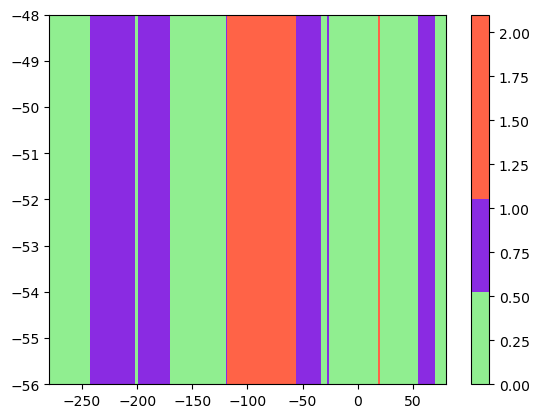

In [40]:
plt.pcolormesh(lon_along_contour[:-1], [-50,-54], ASC_regimes_2d[:,:-1],vmin=0,vmax=2.1, cmap=CustomCmap_no4)
plt.colorbar()

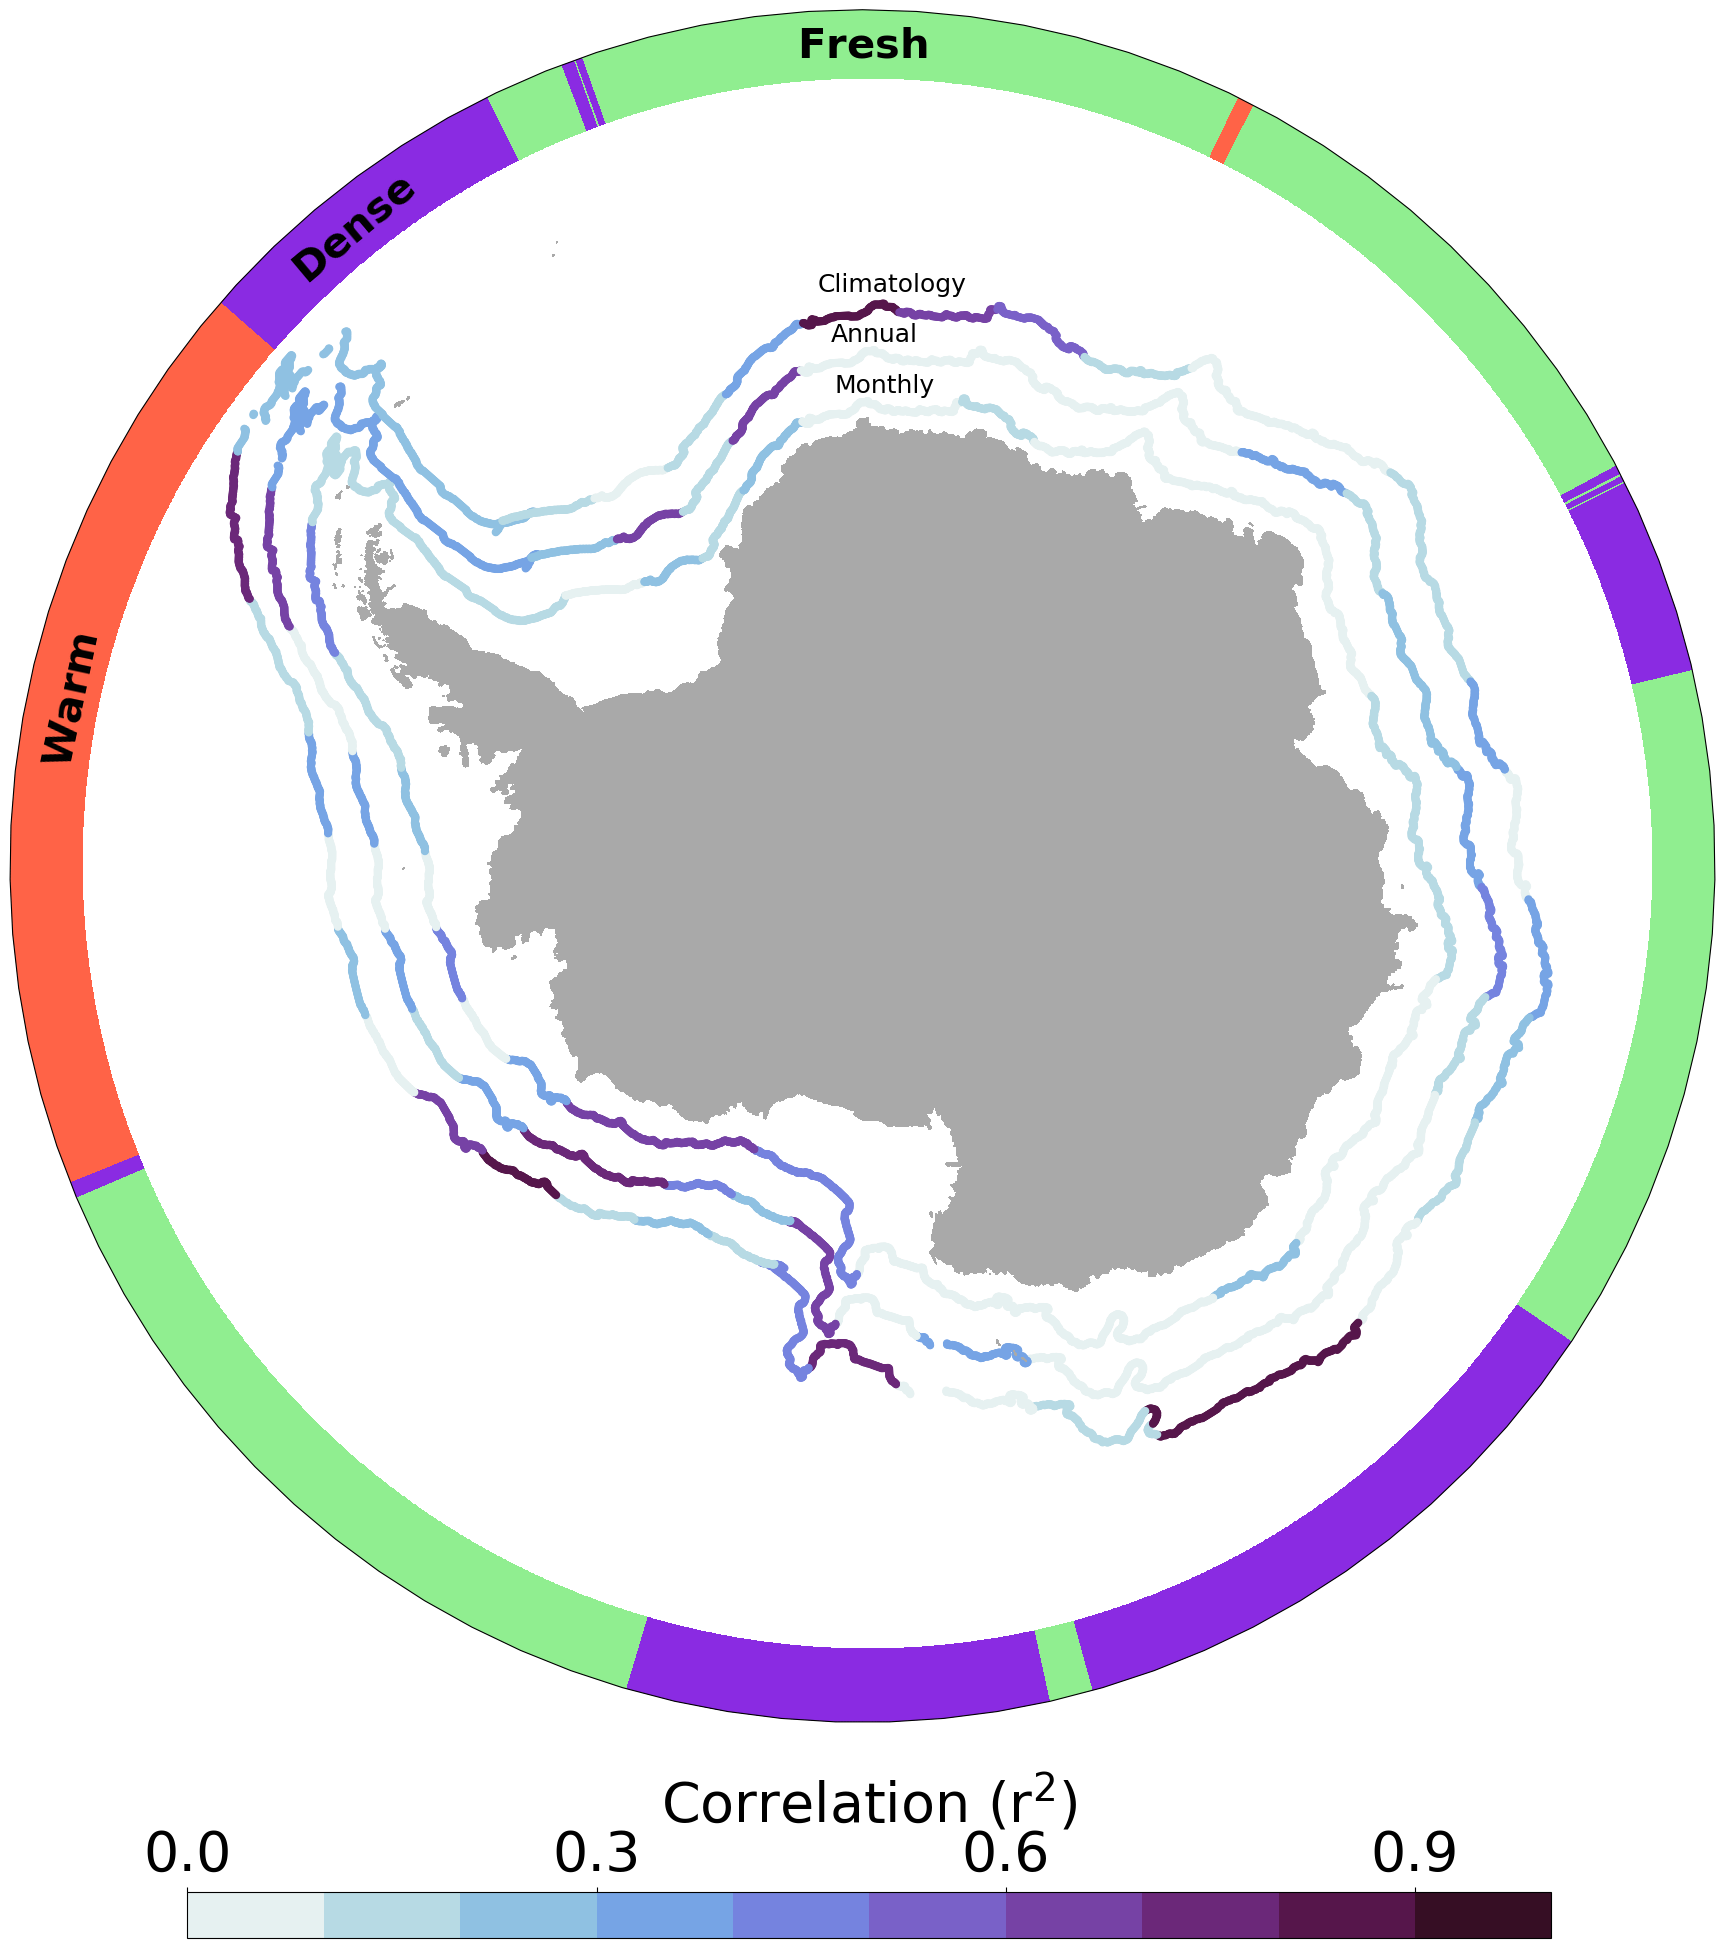

In [41]:
fontsize=40
proj = ccrs.PlateCarree()
markersize = 23

fig = plt.figure(1, figsize = (22, 25))
ax_cric = plt.subplot(1,1,1, projection=ccrs.SouthPolarStereo())
ax_cric.set_extent([-180, 180, -90, -53], proj)
ax_cric.set_boundary(circle, transform=ax_cric.transAxes)

scat = ax_cric.scatter(CSHT_lon_along_contour, CSHT_lat_along_contour,s=markersize, c = r_sq_all_10deg_interp, cmap = discrete_cmap(10, cmocean.dense), 
                       vmin = 0, vmax = 1, transform=proj)
scat_annual = ax_cric.scatter(CSHT_lon_along_contour_level2, CSHT_lat_along_contour_level2,s=markersize ,c = r_sq_annual_10deg_interp, cmap = discrete_cmap(10, cmocean.dense), 
                       vmin = 0, vmax = 1, transform=proj)
scat_clim = ax_cric.scatter(CSHT_lon_along_contour_level3, CSHT_lat_along_contour_level3,s=markersize, c = r_sq_clima_10deg_interp, cmap = discrete_cmap(10, cmocean.dense), 
                       vmin = 0, vmax = 1, transform=proj)

REGIME = plt.pcolormesh(lon_along_contour[:-1]+7, [-50,-54], ASC_regimes_2d[:,:-1] ,vmin=0,vmax=2.1\
               , cmap=CustomCmap_no4, transform=proj)

#regimes legend
plt.text(-5,-55,r'$\bf{Fresh}$', transform=proj,fontsize=30)
plt.text(-45,-54.5,r'$\bf{Dense}$', transform=proj,fontsize=30,rotation=40)
plt.text(-83,-54,r'$\bf{Warm}$', transform=proj,fontsize=30,rotation=78)

#correlations legend
plt.text(-5,-64.8,r'Climatology', transform=proj,fontsize=18)
plt.text(-4,-67,r'Annual', transform=proj,fontsize=18)
plt.text(-4,-69.2,r'Monthly', transform=proj,fontsize=18)

ax_cric.contourf(hu.xu_ocean, land_mask_lat-0.7, land_mask_masked, colors='darkgrey', zorder=2, transform=proj)
#ax_cric.set_ylim([-80,-57])
ax_cric.set_ylabel('Longitude ($\degree$S)',fontsize=fontsize)
ax_cric.set_xlabel('Latitude ($\degree$E)',fontsize=fontsize)
#ax_cric.set_title('Correlations',fontsize=fontsize)
ax_cric.tick_params(labelsize=fontsize)

axins1 = inset_axes(
    ax_cric,
    width="80%",  # width: 50% of parent_bbox width
    height="3%",  # height: 5%
    loc='lower left',
    bbox_to_anchor = (0.1,-0.13,1,0.9),
    bbox_transform=ax_cric.transAxes)
cb = fig.colorbar(scat, cax = axins1, orientation = 'horizontal')#, label = 'Correlation (r$^2$)',fontsize=fontsize)
cb.set_label('Correlation (r$^2$)',fontsize=fontsize)
cb.set_ticks([0,0.3,0.6,.9])
cb.ax.xaxis.set_ticks_position("top")
cb.ax.xaxis.set_label_position("top")
cb.ax.tick_params(labelsize=fontsize)


# plt.savefig(figdir+'Correlations_Stereo.png',dpi=300,bbox_inches='tight')
# plt.savefig(figdir+'Correlations_Stereo.pdf',dpi=300,bbox_inches='tight')


Let's try now the slopes

In [42]:
r_sq_all_10deg.sel(lon_bins=-133.5).values

array(0.66185267)

In [43]:
r_sq_all_10deg.sel(lon_bins=-243.5).values

array(0.02346306)

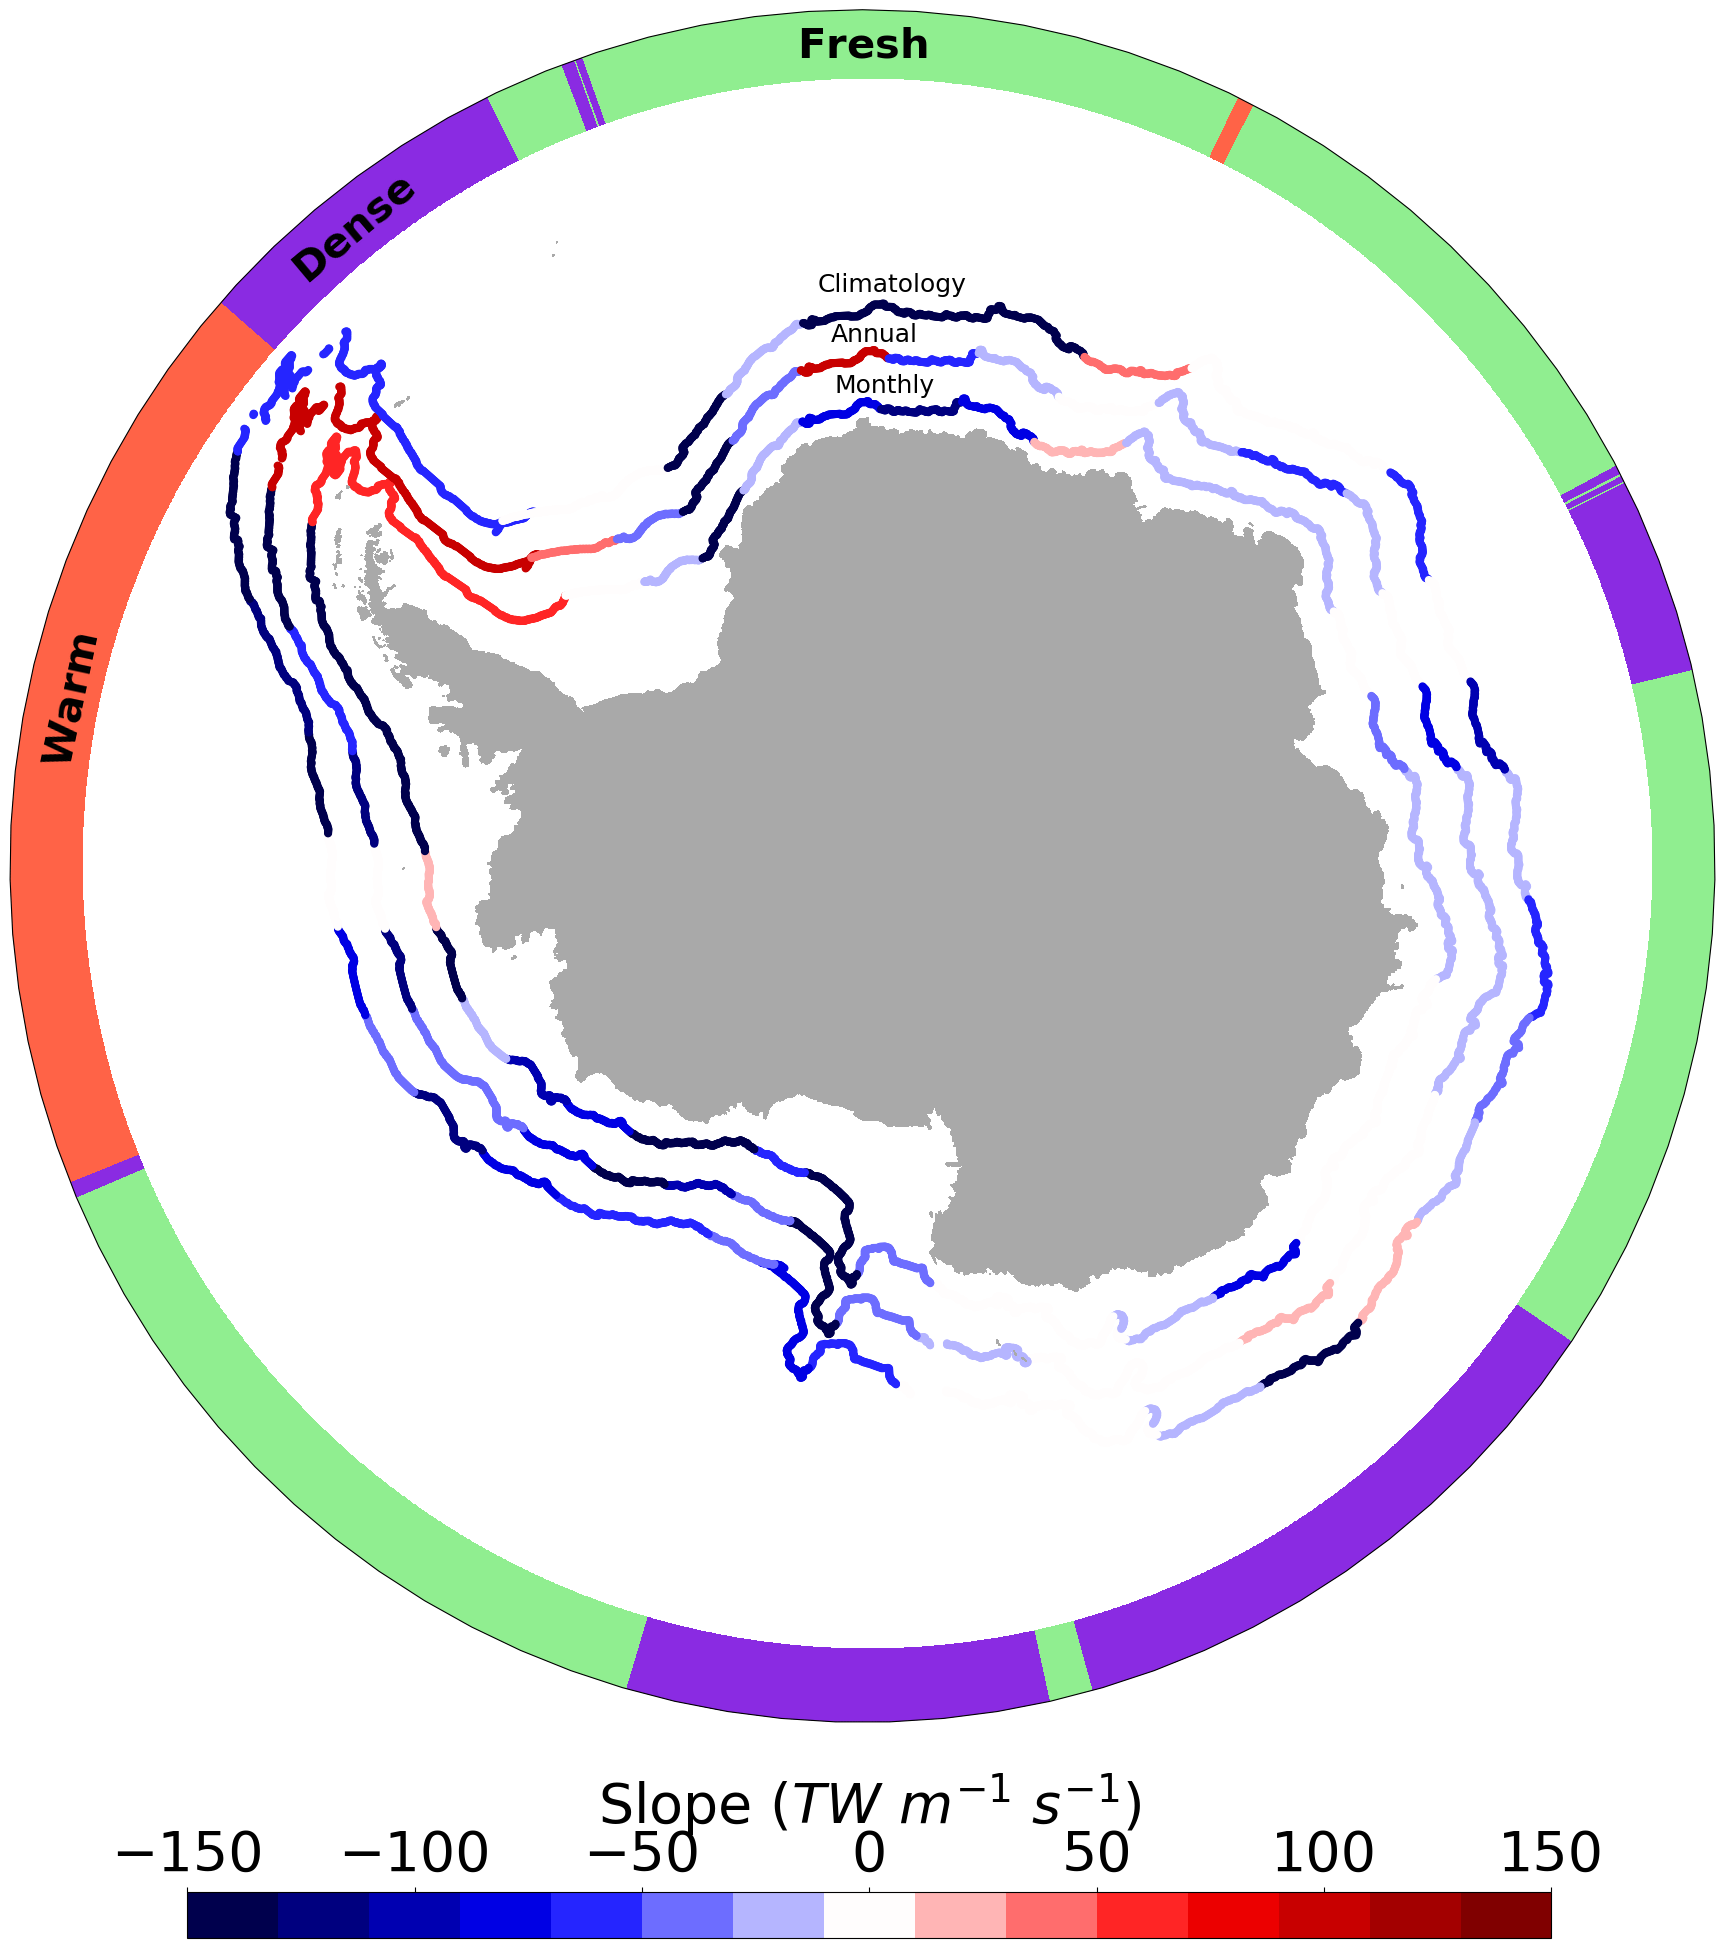

In [44]:
fontsize=40
proj = ccrs.PlateCarree()
markersize = 23

fig = plt.figure(1, figsize = (22, 25))
ax_cric = plt.subplot(1,1,1, projection=ccrs.SouthPolarStereo())
ax_cric.set_extent([-180, 180, -90, -53], proj)
ax_cric.set_boundary(circle, transform=ax_cric.transAxes)

scat = ax_cric.scatter(CSHT_lon_along_contour, CSHT_lat_along_contour,s=markersize, c = slope_sq_all_10deg_interp, cmap = discrete_cmap(15, 'seismic'), 
                       vmin = -150, vmax = 150, transform=proj)
scat_annual = ax_cric.scatter(CSHT_lon_along_contour_level2, CSHT_lat_along_contour_level2,s=markersize ,c = slope_sq_annual_10deg_interp, cmap = discrete_cmap(15, 'seismic'), 
                       vmin = -150, vmax = 150, transform=proj)
scat_clim = ax_cric.scatter(CSHT_lon_along_contour_level3, CSHT_lat_along_contour_level3,s=markersize, c = slope_sq_clima_10deg_interp, cmap = discrete_cmap(15, 'seismic'), 
                       vmin = -150, vmax = 150, transform=proj)

REGIME = plt.pcolormesh(lon_along_contour[:-1]+7, [-50,-54], ASC_regimes_2d[:,:-1] ,vmin=0,vmax=2.1\
               , cmap=CustomCmap_no4, transform=proj)

#regimes legend
plt.text(-5,-55,r'$\bf{Fresh}$', transform=proj,fontsize=30)
plt.text(-45,-54.5,r'$\bf{Dense}$', transform=proj,fontsize=30,rotation=40)
plt.text(-83,-54,r'$\bf{Warm}$', transform=proj,fontsize=30,rotation=78)

#correlations legend
plt.text(-5,-64.8,r'Climatology', transform=proj,fontsize=18)
plt.text(-4,-67,r'Annual', transform=proj,fontsize=18)
plt.text(-4,-69.2,r'Monthly', transform=proj,fontsize=18)

ax_cric.contourf(hu.xu_ocean, land_mask_lat-0.7, land_mask_masked, colors='darkgrey', zorder=2, transform=proj)
#ax_cric.set_ylim([-80,-57])
ax_cric.set_ylabel('Longitude ($\degree$S)',fontsize=fontsize)
ax_cric.set_xlabel('Latitude ($\degree$E)',fontsize=fontsize)
#ax_cric.set_title('Correlations',fontsize=fontsize)
ax_cric.tick_params(labelsize=fontsize)

axins1 = inset_axes(
    ax_cric,
    width="80%",  # width: 50% of parent_bbox width
    height="3%",  # height: 5%
    loc='lower left',
    bbox_to_anchor = (0.1,-0.13,1,0.9),
    bbox_transform=ax_cric.transAxes)
cb = fig.colorbar(scat, cax = axins1, orientation = 'horizontal')#, label = 'Correlation (r$^2$)',fontsize=fontsize)
cb.set_label('Slope ($TW\ m^{-1}\ s^{-1}$)',fontsize=fontsize)
cb.set_ticks([-150,-100,-50,0,50,100,150])
cb.ax.xaxis.set_ticks_position("top")
cb.ax.xaxis.set_label_position("top")
cb.ax.tick_params(labelsize=fontsize)



# plt.savefig(figdir+'Slopes_Stereo.png',dpi=300,bbox_inches='tight')
# plt.savefig(figdir+'Slopes_Stereo.pdf',dpi=300,bbox_inches='tight')

And now a plot with the ASC for testing

In [45]:
iaf_cycle3 = '01deg_jra55v140_iaf_cycle3'
session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
ylength=580

ht = (cc.querying.getvar(iaf_cycle3,'ht' , session,n=1,chunks={}).isel(yt_ocean=slice(0,ylength)))
ht.load()
      
def shelf_mask_isobath(var):
    '''
    Masks ACCESS-OM2-01 variables by the region polewards of the 1000m isobath as computed using 
    a script contributed by Adele Morrison.
    Only to be used with ACCESS-OM2-0.1 output!
    '''
    contour_file = np.load('/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz')
    
    shelf_mask = contour_file['contour_masked_above']
    yt_ocean = contour_file['yt_ocean']
    xt_ocean = contour_file['xt_ocean']
    
    # in this file the points along the isobath are given a positive value, the points outside (northwards) 
    # of the isobath are given a value of -100 and all the points on the continental shelf have a value of 0 
    # so we mask for the 0 values 
    shelf_mask[np.where(shelf_mask!=0)] = np.nan
    shelf_mask = shelf_mask+1
    shelf_map  = np.nan_to_num(shelf_mask)
    shelf_mask = xr.DataArray(shelf_mask, coords = [('yt_ocean', yt_ocean), ('xt_ocean', xt_ocean)])
    shelf_map  = xr.DataArray(shelf_map,  coords = [('yt_ocean', yt_ocean), ('xt_ocean', xt_ocean)])
    
    # then we want to multiply the variable with the mask so we need to account for the shape of the mask. 
    # The mask uses a northern cutoff of 59S.
    masked_var = var.sel(yt_ocean = slice(-90, -59.03)) * shelf_mask

    return masked_var, shelf_map

ht_shelf, shelf_mask = shelf_mask_isobath(ht)

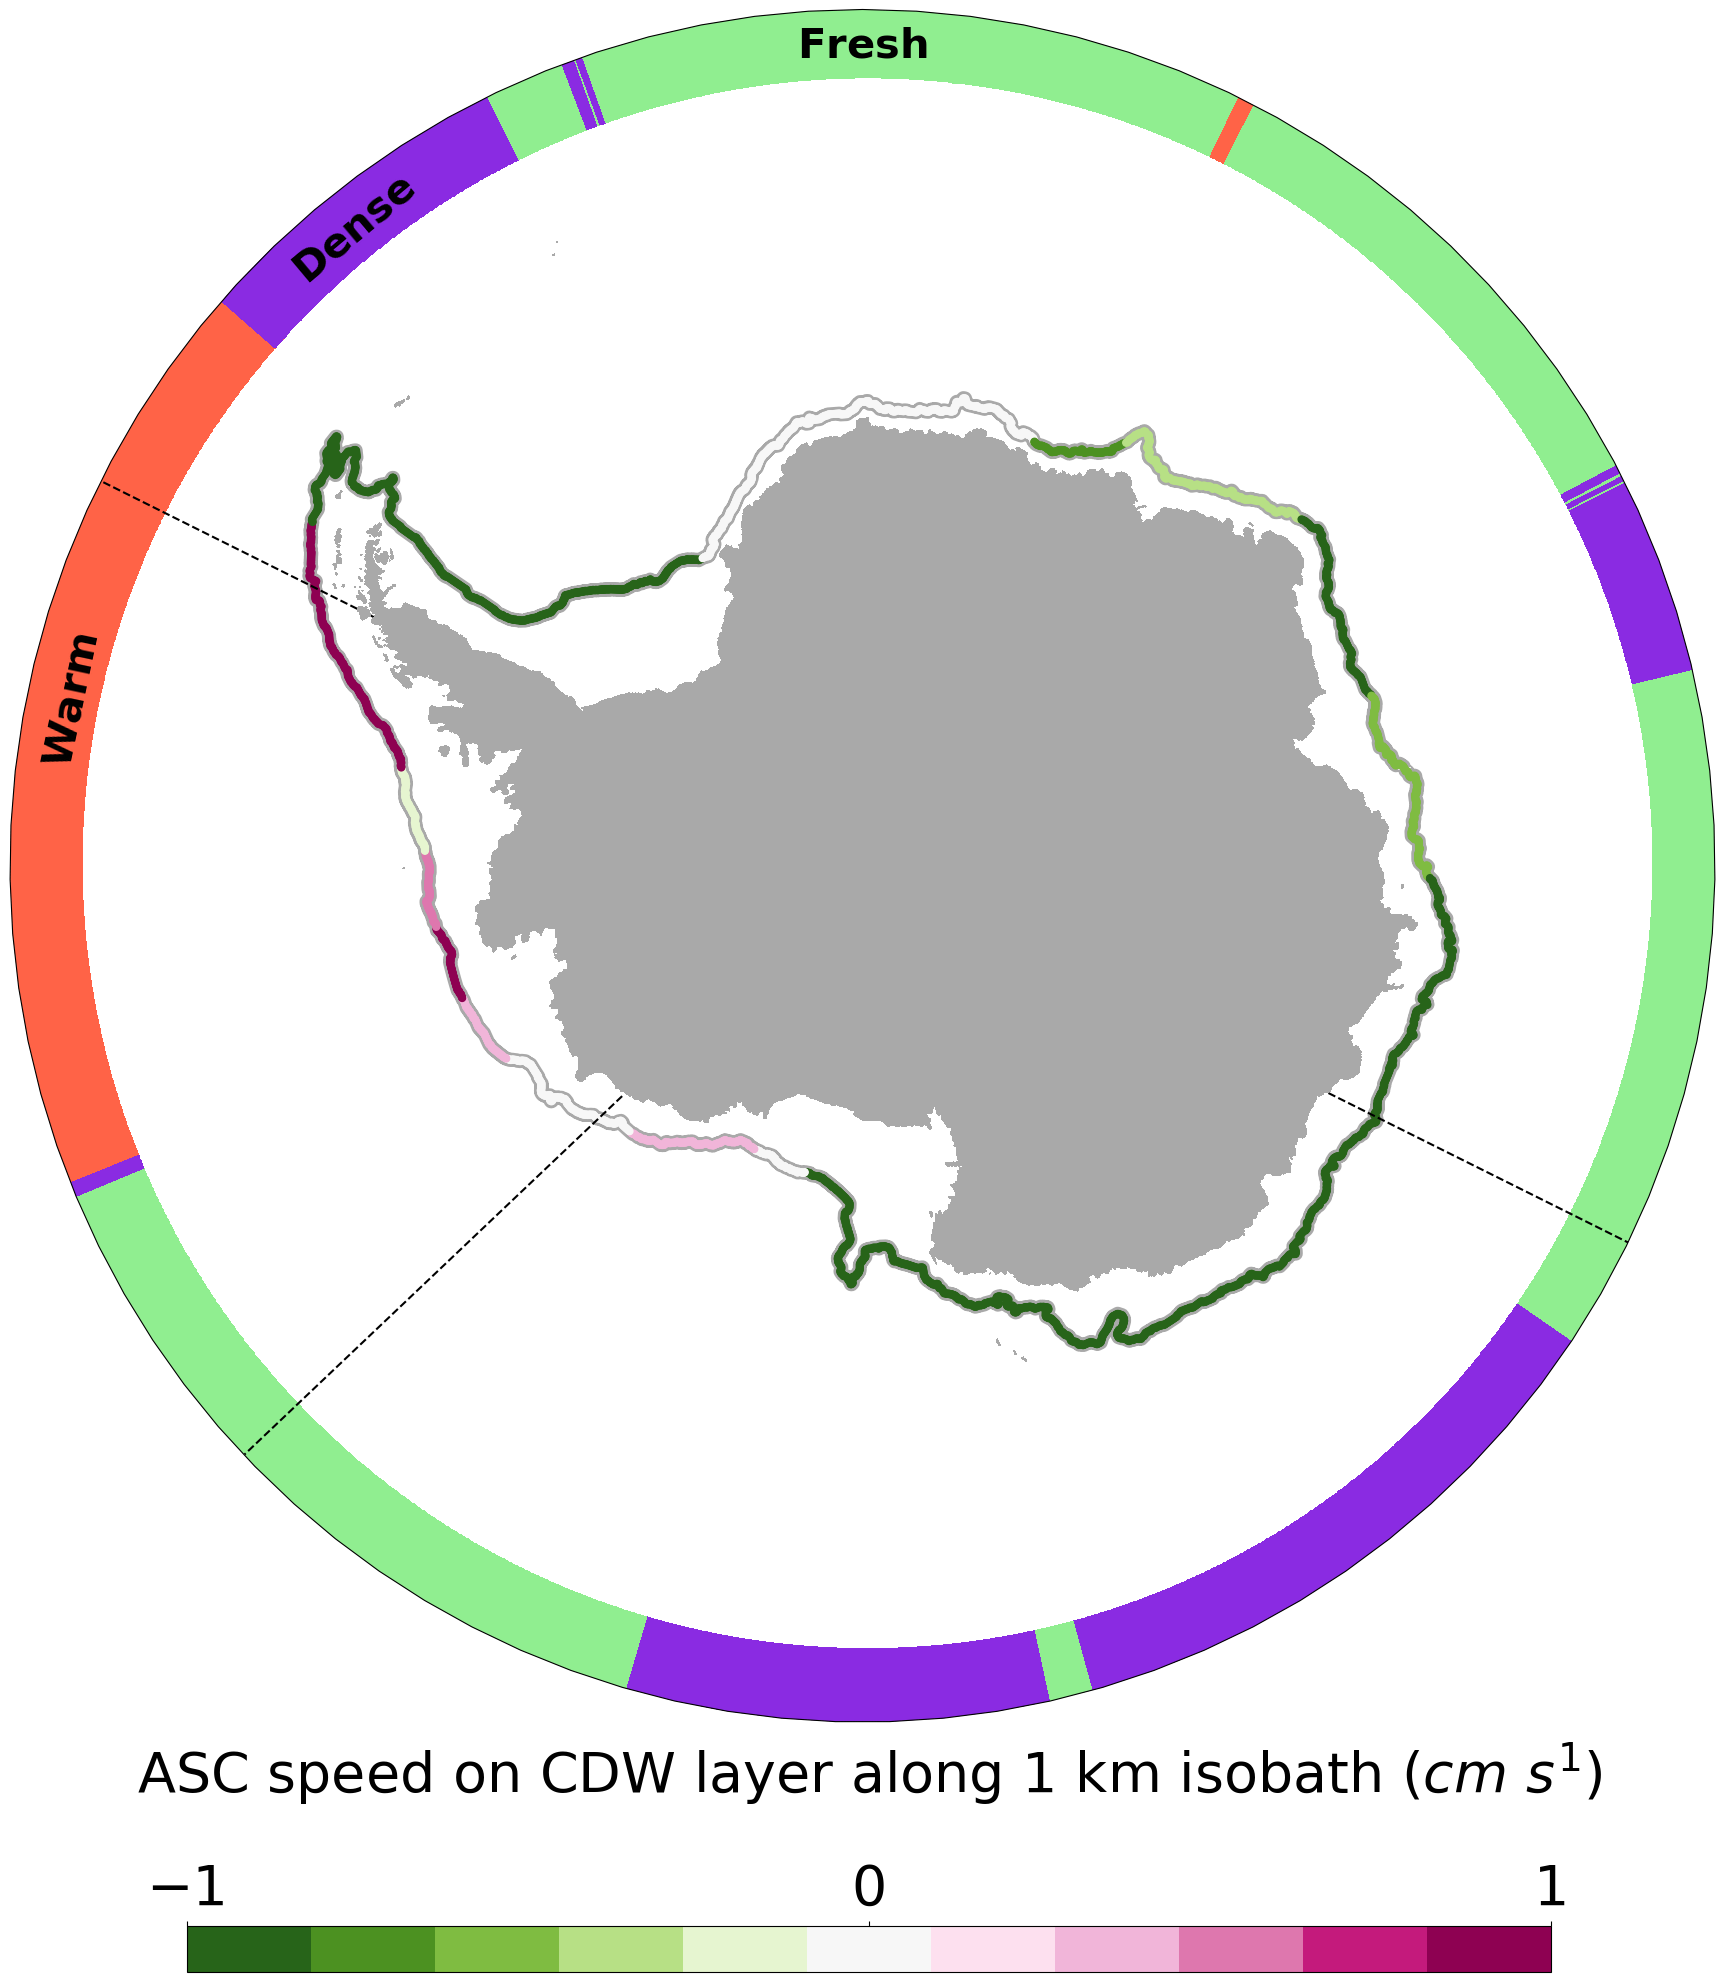

In [46]:
fontsize=40
proj = ccrs.PlateCarree()
markersize = 23

fig = plt.figure(1, figsize = (22, 25))
ax_cric = plt.subplot(1,1,1, projection=ccrs.SouthPolarStereo())
ax_cric.set_extent([-180, 180, -90, -53], proj)
ax_cric.set_boundary(circle, transform=ax_cric.transAxes)

scat = ax_cric.scatter(CSHT_lon_along_contour, CSHT_lat_along_contour,s=markersize, c = U_along_10deg_interp_CDW_toplot*100, cmap = discrete_cmap(11, 'PiYG_r'), 
                       vmin = -1, vmax = 1, transform=proj)


REGIME = plt.pcolormesh(lon_along_contour[:-1]+7, [-50,-54], ASC_regimes_2d[:,:-1] ,vmin=0,vmax=2.1\
               , cmap=CustomCmap_no4, transform=proj)

shelf_mask.plot.contour(x='xt_ocean',y='yt_ocean',levels=[0.5],colors='darkgray',\
                        linewidths=10, transform=proj,add_colorbar=False,zorder=0)
plt.plot([-133.5,-133.5],[-75,-53],linestyle='--',color='black',transform=proj)
plt.plot([-243.5,-243.5],[-75,-53],linestyle='--',color='black',transform=proj)
plt.plot([-63.5,-63.5],[-75,-53],linestyle='--',color='black',transform=proj)
#regimes legend
plt.text(-5,-55,r'$\bf{Fresh}$', transform=proj,fontsize=30)
plt.text(-45,-54.5,r'$\bf{Dense}$', transform=proj,fontsize=30,rotation=40)
plt.text(-83,-54,r'$\bf{Warm}$', transform=proj,fontsize=30,rotation=78)

#plt.text(-213,-37.5,r'$\bf{Eastward}$', transform=proj,fontsize=30)
#plt.text(-139,-32,r'$\bf{Westward}$', transform=proj,fontsize=30)
#correlations legend
#plt.text(-4,-69.2,r'ASC speed', transform=proj,fontsize=18)

ax_cric.contourf(hu.xu_ocean, land_mask_lat-0.7, land_mask_masked, colors='darkgrey', zorder=2, transform=proj)
#ax_cric.set_ylim([-80,-57])
ax_cric.set_ylabel('Longitude ($\degree$S)',fontsize=fontsize)
ax_cric.set_xlabel('Latitude ($\degree$E)',fontsize=fontsize)
#ax_cric.set_title('Correlations',fontsize=fontsize)
ax_cric.tick_params(labelsize=fontsize)

axins1 = inset_axes(
    ax_cric,
    width="80%",  # width: 50% of parent_bbox width
    height="3%",  # height: 5%
    loc='lower left',
    bbox_to_anchor = (0.1,-0.15,1,0.9),
    bbox_transform=ax_cric.transAxes)
cb = fig.colorbar(scat, cax = axins1, orientation = 'horizontal')#, label = 'Correlation (r$^2$)',fontsize=fontsize)
cb.set_label('ASC speed on CDW layer ' +r'along 1 km isobath ($cm \ s^1$)' + '\n' ,fontsize=fontsize)
cb.set_ticks([-1,0,1])
cb.ax.xaxis.set_ticks_position("top")
cb.ax.xaxis.set_label_position("top")
cb.ax.tick_params(labelsize=fontsize)


# plt.savefig(figdir+'ASC_Stereo.png',dpi=300,bbox_inches='tight')
# plt.savefig(figdir+'ASC_Stereo.pdf',dpi=300,bbox_inches='tight')